# Study of CP asymmetry in B to KKK Decay

In [2]:
import uproot
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as colors

from scipy.optimize import curve_fit
from scipy.stats import argus

KAON_MASS = 493.677 #MeV/c^2
PION_MASS = 139.570 #MeV/c^2

In [3]:
path = '/shared/'
events_down = uproot.open(path+'B2HHH_MagnetDown.root')
events_up = uproot.open(path+'B2HHH_MagnetUp.root')

In [4]:
def tree_selector(trees):

    p_x_raw, p_y_raw, p_z_raw = np.empty((0, 3)), np.empty((0, 3)), np.empty((0, 3))
    prob_pi, prob_k = np.empty((0, 3)), np.empty((0, 3))
    charge_raw = np.empty((0, 3))
    is_muon = np.empty((0, 3))
    
    for tree in trees:

        for data in tree.iterate([b'H*_P[XYZ]',b'H*_Charge',b'H*_Prob*',b'H*_isMuon']):

            temp = np.hstack((data[b'H1_ProbPi'].reshape(-1, 1), data[b'H2_ProbPi'].reshape(-1, 1), data[b'H3_ProbPi'].reshape(-1, 1)))
            prob_pi = np.vstack((prob_pi, temp))

            temp = np.hstack((data[b'H1_ProbK'].reshape(-1, 1), data[b'H2_ProbK'].reshape(-1, 1), data[b'H3_ProbK'].reshape(-1, 1)))
            prob_k = np.vstack((prob_k, temp))

            temp = np.hstack((data[b'H1_PX'].reshape(-1, 1), data[b'H2_PX'].reshape(-1, 1), data[b'H3_PX'].reshape(-1, 1)))
            p_x_raw = np.vstack((p_x_raw, temp))

            temp = np.hstack((data[b'H1_PY'].reshape(-1, 1), data[b'H2_PY'].reshape(-1, 1), data[b'H3_PY'].reshape(-1, 1)))
            p_y_raw = np.vstack((p_y_raw, temp))

            temp = np.hstack((data[b'H1_PZ'].reshape(-1, 1), data[b'H2_PZ'].reshape(-1, 1), data[b'H3_PZ'].reshape(-1, 1)))
            p_z_raw = np.vstack((p_z_raw, temp))

            temp = np.hstack((data[b'H1_Charge'].reshape(-1, 1), data[b'H2_Charge'].reshape(-1, 1), data[b'H3_Charge'].reshape(-1, 1)))
            charge_raw = np.vstack((charge_raw, temp))

            temp = np.hstack((data[b'H1_isMuon'].reshape(-1, 1), data[b'H2_isMuon'].reshape(-1, 1), data[b'H3_isMuon'].reshape(-1, 1)))
            is_muon = np.vstack((is_muon, temp))
        
    return p_x_raw, p_y_raw, p_z_raw, charge_raw, prob_pi, prob_k, is_muon

In [5]:
trees = [events_down[b'DecayTree'],events_up['DecayTree']]   # Magnet down+up data

p_x_raw, p_y_raw, p_z_raw, charge_raw, prob_pi, prob_k, is_muon = tree_selector(trees)

# Selection

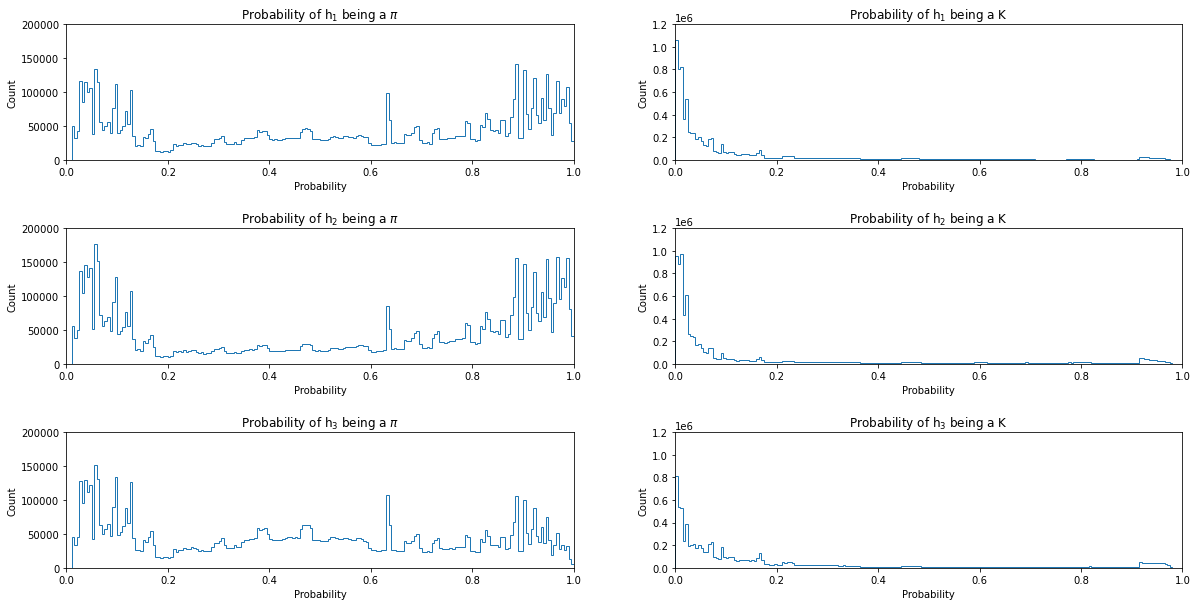

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5) # increase horizontal space between plots

particle = ["h$_1$", "h$_2$", "h$_3$"]

for count, col in enumerate(ax):
        
        col[0].hist(prob_pi[:, int(count)], bins = 200, range = [0, 1],histtype='step',label='$p_{T}$')
        col[0].set_ylim(0, 2*10**5)
        col[0].set_xlim(0, 1)
        col[0].set_xlabel("Probability")
        col[0].set_ylabel("Count")
        col[0].set_title("Probability of "+particle[count]+" being a $\pi$")
        
        col[1].hist(prob_k[:, int(count)], bins = 200, range = [0, 1],histtype='step',label='$p_{T}$')
        col[1].set_ylim(0, 1.2*10**6)
        col[1].set_xlim(0, 1)
        col[1].set_xlabel("Probability")
        col[1].set_ylabel("Count")
        col[1].set_title("Probability of "+particle[count]+" being a K")

plt.savefig("particle_probabilites_1d.png")
plt.show()

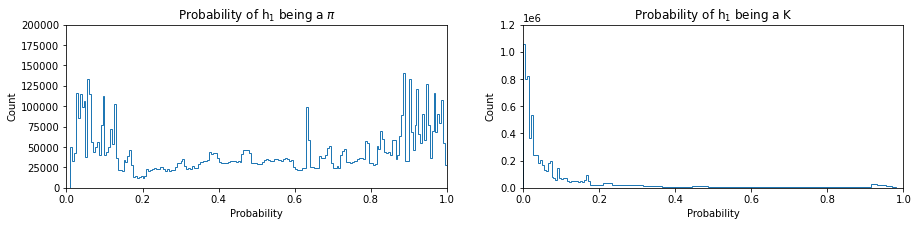

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
fig.subplots_adjust(hspace=0.5) # increase horizontal space between plots

particle = ["h$_1$"]
count = 0
        
ax[0].hist(prob_pi[:, int(count)], bins = 200, range = [0, 1],histtype='step',label='$p_{T}$')
ax[0].set_ylim(0, 2*10**5)
ax[0].set_xlim(0, 1)
ax[0].set_xlabel("Probability")
ax[0].set_ylabel("Count")
ax[0].set_title("Probability of "+particle[count]+" being a $\pi$")

ax[1].hist(prob_k[:, int(count)], bins = 200, range = [0, 1],histtype='step',label='$p_{T}$')
ax[1].set_ylim(0, 1.2*10**6)
ax[1].set_xlim(0, 1)
ax[1].set_xlabel("Probability")
ax[1].set_ylabel("Count")
ax[1].set_title("Probability of "+particle[count]+" being a K")

plt.savefig("particle_probabilites_1d.png", bbox_inches='tight')
plt.show()

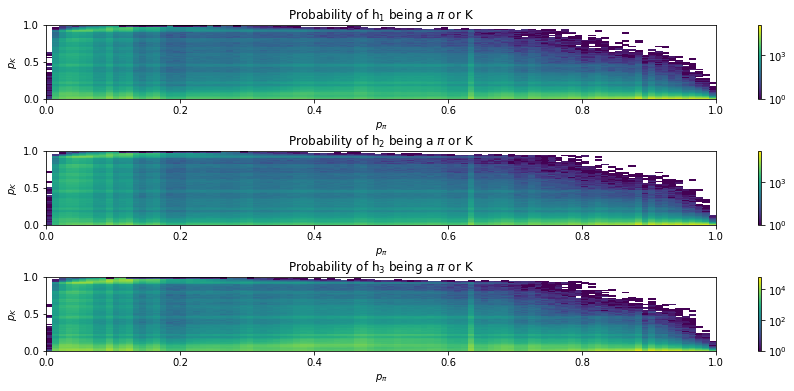

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 6))
fig.subplots_adjust(hspace=0.7) # increase horizontal space between plots

particle = ["h$_1$", "h$_2$", "h$_3$"]

for count, ax in enumerate(axes):

    hist = ax.hist2d(prob_pi[:, count], prob_k[:, count], bins = [100,100], range = [[0, 1],[0, 1]], norm=colors.LogNorm())
    
    ax.set_xlabel(r'$p_{\pi}$')
    ax.set_ylabel(r'$p_{K}$')
    ax.set_title("Probability of "+particle[count]+" being a $\pi$ or K")
    fig.colorbar(hist[3],ax=ax)

plt.savefig("particle_probabilites_2d.png")
plt.show()

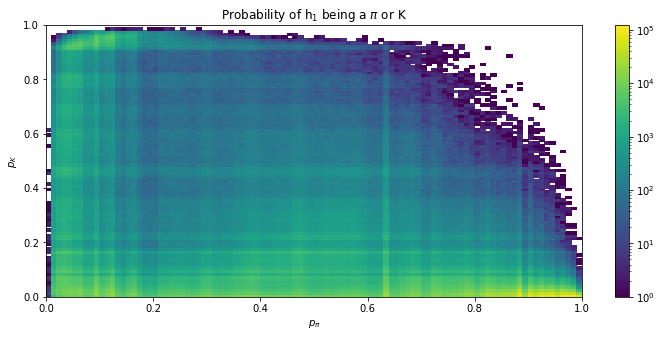

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
fig.subplots_adjust(hspace=0.7) # increase horizontal space between plots

particle = ["h$_1$"]
count = 0

hist = ax.hist2d(prob_pi[:, count], prob_k[:, count], bins = [100,100], range = [[0, 1],[0, 1]], norm=colors.LogNorm())

ax.set_xlabel(r'$p_{\pi}$')
ax.set_ylabel(r'$p_{K}$')
ax.set_title("Probability of "+particle[count]+" being a $\pi$ or K")
fig.colorbar(hist[3],ax=ax)

plt.savefig("particle_probabilites_2d.png", bbox_inches='tight')
plt.show()

In [10]:
def selector(p_x, p_y, p_z, charge, prob_k, is_muon):
    
    np.sort(prob_k, axis=0)

    kaon_ind = np.where((prob_k[:, 0] > 0.5) & (prob_k[:, 1] > 0.4) & (prob_k[:, 2] > 0.3))[0]
    kaon_sum = np.where(np.sum(prob_k, 1) > 1.8)[0]
    kaon = np.unique(np.hstack((kaon_ind, kaon_sum)))

    not_muon = np.where((is_muon[:, 0] == 0) & (is_muon[:, 1] == 0) & (is_muon[:, 2] == 0))[0]
    kaon, ind, unq_count = np.unique(np.hstack((kaon, not_muon)), return_inverse=True, return_counts=True)
    kaon = kaon[unq_count > 1]

    return p_x[kaon, :], p_y[kaon, :], p_z[kaon, :], charge[kaon, :]

p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon = selector(p_x_raw, p_y_raw, p_z_raw, charge_raw, prob_k, is_muon)

# Invarient Mass Calculations

In [10]:
def invariant_mass_calulator(p_x, p_y, p_z):

    E = np.sum(np.sqrt(KAON_MASS ** 2 + (p_x[:, :]**2 + p_y[:, :]**2 + p_z[:, :]**2)), 1)
    p_total = np.sqrt(np.sum(p_x, 1)**2 + np.sum(p_y, 1)**2 + np.sum(p_z, 1)**2)

    return np.sqrt((E ** 2) - (p_total ** 2))

In [11]:
def peak_detector(count):

    count_signs = np.sign(np.diff(count))

    x = 0
    array = np.empty((0, 2))

    for n, sign in enumerate(count_signs[:-1]):
        
        x += 1

        if count_signs[n+1] != count_signs[n]:
            array = np.vstack((array, ([n, x])))
            x = 0
        
    consecutive_1 = np.argmax(array[:, 1])
    consecutive_2 = np.argmax(array[:consecutive_1:, 1])
    
    if consecutive_1 > consecutive_2:        
        down_slope, up_slope = array[consecutive_1, 0]+1, array[consecutive_2-1, 0]+1
        
    elif consecutive_1 < consecutive_2:        
        up_slope, down_slope = array[consecutive_1-1, 0]+1, array[consecutive_2, 0]+1
    
    return int(up_slope), int(down_slope)

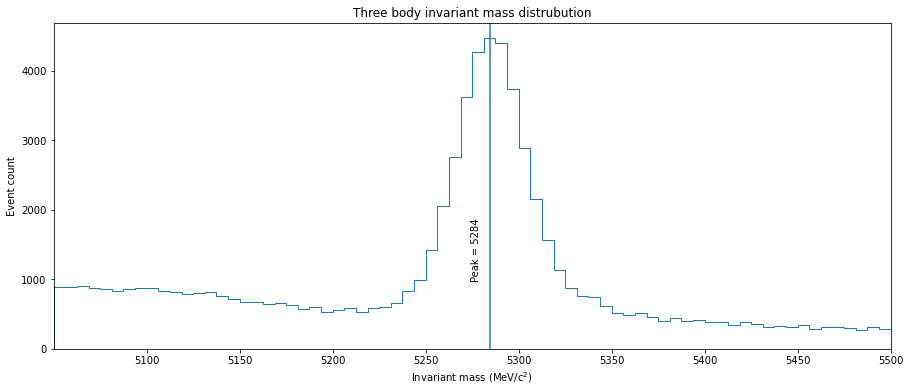

In [12]:
def invariant_mass_count_graph(p_x, p_y, p_z):

    b_invariant_mass = invariant_mass_calulator(p_x, p_y, p_z)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots

    count, bins = np.histogram(b_invariant_mass, bins=200)

    ax.hist(b_invariant_mass, bins=200, histtype='step',label='$p_{T}$')
    ax.set_xlim(np.min(bins), 5500)
    
    peak = bins[np.argmax(count)]+(bins[1]-bins[0])/2 
    ax.axvline(x=peak)
    ax.text(peak-10, 1000, "Peak = "+str(int(bins[np.argmax(count)]+(bins[1]-bins[0])/2)),  rotation="vertical")
    
    up_slope, down_slope = peak_detector(count)
    
    ax.set_xlabel("Invariant mass (MeV/c$^2$)")
    ax.set_ylabel("Event count")
    ax.set_title("Three body invariant mass distrubution")

    plt.savefig("invariant_mass_distrubtion.png")
    plt.show()
    
    return bins[int(up_slope)], bins[int(down_slope)], b_invariant_mass

up_slope, down_slope, b_invariant_mass = invariant_mass_count_graph(p_x_kaon, p_y_kaon, p_z_kaon)

In [13]:
def peak_selector(up_slope, down_slope, b_invariant_mass, p_x, p_y, p_z, charge):
       
    peak = np.where((b_invariant_mass > up_slope) & (b_invariant_mass < down_slope))[0]
    
    return p_x[peak, :], p_y[peak, :], p_z[peak, :], charge[peak, :]

p_x_peak, p_y_peak, p_z_peak, charge_peak = peak_selector(up_slope, down_slope, b_invariant_mass, p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon)

# Two Body Resonance

In [14]:
def two_body_calculator(p_x1, p_y1, p_z1, p_x2, p_y2, p_z2, kaon_mass=KAON_MASS):
    
    E_1 = np.sqrt(kaon_mass ** 2 + (p_x1**2 + p_y1**2 + p_z1**2))
    E_2 = np.sqrt(kaon_mass ** 2 + (p_x2**2 + p_y2**2 + p_z2**2))

    p_total = (p_x1 + p_x2)**2 + (p_y1 + p_y2)**2 + (p_z1 + p_z2)**2

    return np.sqrt((E_1 + E_2)**2 - p_total)

def two_body_invariant_mass(p_x, p_y, p_z, charge):
    
    invariant_masses = np.empty((0, 2))
    
    for i, c in enumerate(charge):
        
        temp = ([])
              
        if c[0] != c[1]:
            invariant_mass01 = two_body_calculator(p_x[i, 0], p_y[i, 0], p_z[i, 0], p_x[i, 1], p_y[i, 1], p_z[i, 1])            
            temp = np.append(temp, invariant_mass01)
            
        if c[1] != c[2]:
            invariant_mass12 = two_body_calculator(p_x[i, 1], p_y[i, 1], p_z[i, 1], p_x[i, 2], p_y[i, 2], p_z[i, 2])            
            temp = np.append(temp, invariant_mass12)
            
        if c[2] != c[0]:
            invariant_mass20 = two_body_calculator(p_x[i, 2], p_y[i, 2], p_z[i, 2], p_x[i, 0], p_y[i, 0], p_z[i, 0])            
            temp = np.append(temp, invariant_mass20)
            
        invariant_masses = np.vstack((invariant_masses, temp.reshape(1, 2)))
            
    return invariant_masses

D_0 peak mass = 1864 ± 19, count = 2091
D_0 peak mass = 1865 ± 19, count = 2091


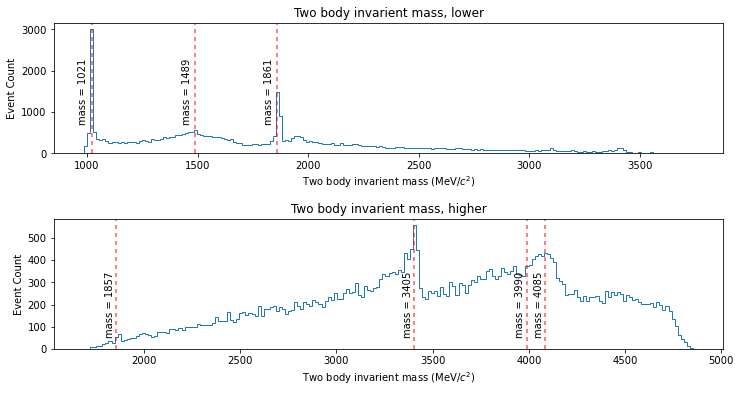

In [15]:
def two_body_mesons(p_x, p_y, p_z, charge):
    
    invariant_masses = np.sort(two_body_invariant_mass(p_x, p_y, p_z, charge), 1)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)
    
    d_0_masses = np.empty((0, 2))
    
    high_low = ["lower", "higher"]
    
    for is_higher, ax in enumerate(axes):
        
        count, bins = np.histogram(invariant_masses[:, is_higher], bins=200)
        half_bin_width = (bins[1] - bins[0]) / 2
        ax.hist(invariant_masses[:, is_higher], bins=200, histtype='step',label='$p_{T}$')

        reduced_count = count

        for i in range(3):
                
                peak = bins[np.argmax(reduced_count)]+half_bin_width
                ax.axvline(x=peak, color='r', dashes=(2, 2), linewidth=2, alpha=0.5)
                if is_higher == 0:
                    ax.text(peak-60, 1500, "mass = "+str(int(peak)), rotation="vertical", verticalalignment="center")
                    
                else:
                    ax.text(peak-60, 200, "mass = "+str(int(peak)), rotation="vertical", verticalalignment="center")
                
                if np.argmax(reduced_count) < 5:
                    reduced_count[0:np.argmax(reduced_count)+5] = 0

                else:
                    reduced_count[np.argmax(reduced_count)-5:np.argmax(reduced_count)+5] = 0

        count, bins = np.histogram(invariant_masses, bins=200)

        d_0_index = np.where((1700 < bins) & (bins < 2000))[0]
        d_0 = d_0_index[0] + np.argmax(count[d_0_index])
        d_0_masses = np.vstack((d_0_masses, ([bins[d_0]-6, bins[d_0+2]])))
        
        ax.set_title("Two body invarient mass, "+high_low[is_higher])
        ax.set_xlabel("Two body invarient mass (MeV$/c^2$)")
        ax.set_ylabel("Event Count")

        if is_higher == 1:
            ax.axvline(x=bins[d_0], color='r', dashes=(2, 2), linewidth=2, alpha=0.5)
            ax.text(bins[d_0]-60, 200, "mass = "+str(int(bins[d_0])), rotation="vertical", verticalalignment="center")
        print("D_0 peak mass = {0:4.0f} ± {1:2.0f}, count = {2:4.0f}".format(bins[d_0]+half_bin_width, bins[1]-bins[0], count[d_0]))
            
    plt.savefig("two_body_invariant_mass.png")    
    plt.show()
    
    return d_0_masses

d_0_masses = two_body_mesons(p_x_peak, p_y_peak, p_z_peak, charge_peak)

In [16]:
def remove_d_0(d_0_masses, p_x, p_y, p_z, charge):
    
    invariant_masses = two_body_invariant_mass(p_x, p_y, p_z, charge)    
    d_0 = np.unique(np.where((invariant_masses > d_0_masses[0, 0]) & (invariant_masses < d_0_masses[0, 1]))[0])
    
    return np.delete(p_x, d_0, 0), np.delete(p_y, d_0, 0), np.delete(p_z, d_0, 0), np.delete(charge, d_0, 0)
    
p_x_d_0, p_y_d_0, p_z_d_0, charge_d_0 = remove_d_0(d_0_masses, p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon)

In [17]:
def two_body_calculator_mis(p_x1, p_y1, p_z1, p_x2, p_y2, p_z2, kaon_mass=KAON_MASS, pion_mass=PION_MASS):
    
    E_1 = np.sqrt(kaon_mass ** 2 + (p_x1**2 + p_y1**2 + p_z1**2))
    E_2 = np.sqrt(pion_mass ** 2 + (p_x2**2 + p_y2**2 + p_z2**2))

    p_total = (p_x1 + p_x2)**2 + (p_y1 + p_y2)**2 + (p_z1 + p_z2)**2

    return np.sqrt((E_1 + E_2)**2 - p_total)

def k_plus(p_x1, p_y1, p_z1, p_x2, p_y2, p_z2, c0, c_total):
    
    if c0 == np.sum(c_total):
        invariant_mass01 = two_body_calculator_mis(p_x1, p_y1, p_z1, p_x2, p_y2, p_z2)            
        return invariant_mass01
    
    else:
        invariant_mass01 = two_body_calculator_mis(p_x2, p_y2, p_z2, p_x1, p_y1, p_z1)            
        return invariant_mass01

def two_body_invariant_mass_mis(p_x, p_y, p_z, charge):
    
    invariant_masses = np.empty((0, 2))
    
    for i, c in enumerate(charge):
        
        temp = ([])
              
        if c[0] != c[1]:
            temp = np.append(temp, k_plus(p_x[i, 1], p_y[i, 1], p_z[i, 1], p_x[i, 0], p_y[i, 0], p_z[i, 0], c[0], c))

        if c[1] != c[2]:            
            temp = np.append(temp, k_plus(p_x[i, 1], p_y[i, 1], p_z[i, 1], p_x[i, 2], p_y[i, 2], p_z[i, 2], c[1], c))
            
        if c[2] != c[0]:
            temp = np.append(temp, k_plus(p_x[i, 2], p_y[i, 2], p_z[i, 2], p_x[i, 0], p_y[i, 0], p_z[i, 0], c[2], c))
            
        invariant_masses = np.vstack((invariant_masses, temp.reshape(1, 2)))
            
    return invariant_masses

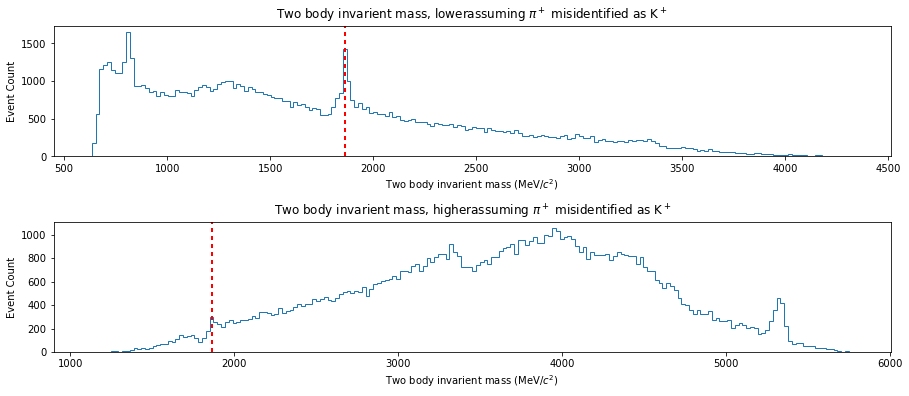

In [18]:
def two_body_mesons_mis(p_x, p_y, p_z, charge, d_0_masses):
    
    invariant_masses = np.sort(two_body_invariant_mass_mis(p_x, p_y, p_z, charge), 1)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.5)
    
    high_low = ["lower", "higher"]
    
    for is_higher, ax in enumerate(axes):
        
        count, bins = np.histogram(invariant_masses[:, is_higher], bins=200)
        half_bin_width = (bins[1] - bins[0]) / 2
        
        ax.hist(invariant_masses[:, is_higher], bins=200, histtype='step',label='$p_{T}$')
        ax.axvline(x=np.mean(d_0_masses[is_higher]-half_bin_width), color='r', dashes=(2, 2), linewidth=2)
        
        ax.set_title("Two body invarient mass, "+high_low[is_higher]+"assuming $\pi^+$ misidentified as K$^+$")
        ax.set_xlabel("Two body invarient mass (MeV$/c^2$)")
        ax.set_ylabel("Event Count")
            
    plt.savefig("two_body_invariant_mass_misidentified.png")    
    plt.show()

two_body_mesons_mis(p_x_d_0, p_y_d_0, p_z_d_0, charge_d_0, d_0_masses)

In [19]:
def remove_d_0(d_0_masses, p_x, p_y, p_z, charge):
    
    invariant_masses = two_body_invariant_mass(p_x, p_y, p_z, charge)
    d_0 = np.unique(np.where((invariant_masses > d_0_masses[0, 0]) & (invariant_masses < d_0_masses[0, 1]))[0])
    
    invariant_masses_mis = two_body_invariant_mass_mis(p_x, p_y, p_z, charge)
    d_0_mis = np.unique(np.where((invariant_masses_mis > d_0_masses[0, 0]) & (invariant_masses_mis < d_0_masses[0, 1]))[0])
    
    d_0 = np.hstack((d_0, d_0_mis))
    
    return np.delete(p_x, d_0, 0), np.delete(p_y, d_0, 0), np.delete(p_z, d_0, 0), np.delete(charge, d_0, 0)
    
p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted = remove_d_0(d_0_masses, p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon)

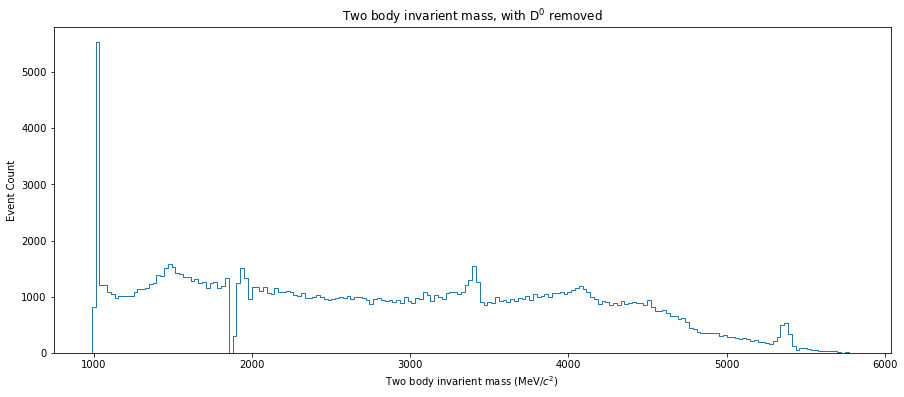

In [20]:
def removed_meson_graph(p_x, p_y, p_z, charge):

    invariant_masses = two_body_invariant_mass(p_x, p_y, p_z, charge).flatten()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots

    count, bins = np.histogram(invariant_masses, bins=200)
    ax.hist(invariant_masses, bins=200, histtype='step',label='$p_{T}$')
    
    ax.set_title("Two body invarient mass, with D$^0$ removed")
    ax.set_xlabel("Two body invarient mass (MeV$/c^2$)")
    ax.set_ylabel("Event Count")

    plt.savefig("two_body_invariant_mass_no_D0.png")
    plt.show()
    
removed_meson_graph(p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted)

In [21]:
def b_plus_minus_mass(p_x, p_y, p_z, charge):
    
    b_invariant_mass = invariant_mass_calulator(p_x, p_y, p_z)

    b_index_plus = np.where((np.sum(charge, 1) == 1) & (b_invariant_mass < 5800))
    b_index_minus = np.where((np.sum(charge, 1) == -1) & (b_invariant_mass < 5800))
    
    b_plus, b_minus = b_invariant_mass[b_index_plus], b_invariant_mass[b_index_minus]

    return b_invariant_mass, ([b_index_plus, b_index_minus])

b_invariant_mass, b_index = b_plus_minus_mass(p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted)

# Matter Antimatter Asymmetry

In [22]:
def chi_squared(data, y_trend, y_err):
    
    chi_squared_cal = np.sum(np.square((data - y_trend) / y_err))
    
    return  chi_squared_cal / len(data)

In [23]:
def gaussian_equation(x, a, b, std, c):
    
    return a * np.exp(-(x-b)**2 / (2*std**2)) + c

def curve_fitter(x, y):
    
    A_0 = np.max(y)
    b_0 = x[np.argmax(y)]
    c_0 = np.min(y)
    
    std_0 = (x[np.where(np.cumsum(y) > 0.841*np.sum(y))[0][0]] - b_0)
    
    coeff, coveriance = curve_fit(gaussian_equation, x, y, p0=[A_0, b_0, std_0, c_0])

    return coeff

Reduced_chi_squared = 6.88
Reduced_chi_squared = 6.84


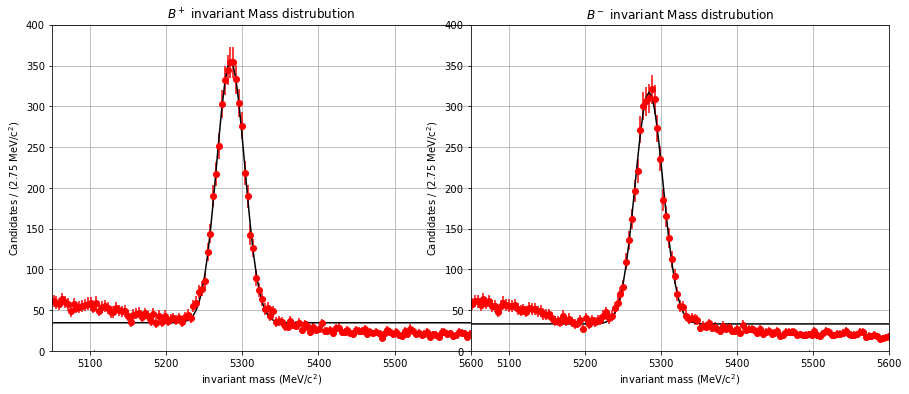

In [24]:
def b_mass_graph(b_invariant_mass, b_index):

    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
    axes = gs.subplots(sharex='row')
    
    titles = ["$B^+$ invariant Mass", "$B^-$ invariant Mass"]

    for is_minus, ax in enumerate(axes):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])

        a, b, s, c = curve_fitter(x[np.where((x > 5050) & (x < 5600))[0]], count[np.where((x > 5050) & (x < 5600))[0]])        
        y_trend = gaussian_equation(x, a, b, s, c)
        
        reduced_chi_squared = chi_squared(count, y_trend, np.sqrt(count))
        print("Reduced_chi_squared = {0:.2f}".format(reduced_chi_squared))

        ax.hist(b_invariant_mass[is_minus], bins=200, histtype='step',label='$p_{T}$')
        ax.errorbar(x, count, yerr=np.sqrt(count), color='r', fmt='o')
        ax.plot(x, y_trend, 'k')

        ax.set_xlim(5050, 5600)
        ax.set_ylim(0, 400)
        ax.grid()  
        ax.set_xlabel("invariant mass (MeV/c$^2$)")
        ax.set_ylabel("Candidates / (2.75 MeV/c$^2$)")
        ax.set_title(titles[is_minus]+" distrubution")

    plt.savefig("invariant_mass_distrubtion_a_gaussian.png")
    plt.show()

b_mass_graph(b_invariant_mass, b_index)

In [25]:
def gaussian_equation(x, a, b, s, m, c, d, f):
    
    return a * np.exp(-(x-b)**2 / (2*s**2)) + d * np.exp(-(x)**2 / (2*f**2)) + c + m * x

def curve_fitter(x, y):
    
    A_0 = np.max(y)
    b_0 = x[np.argmax(y)]
    std_0 = (x[np.where(np.cumsum(y) > 0.841*np.sum(y))[0][0]] - b_0)
    
    c_0 = 200
    m_0 = 100
    
    d_0 = 200
    f_0 = 100
 
    coeff, coveriance = curve_fit(gaussian_equation, x, y, p0=[A_0, b_0, std_0, m_0, c_0, d_0, f_0], maxfev=300000)

    return coeff

/opt/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Reduced_chi_squared = 2.19
Reduced_chi_squared = 2.52


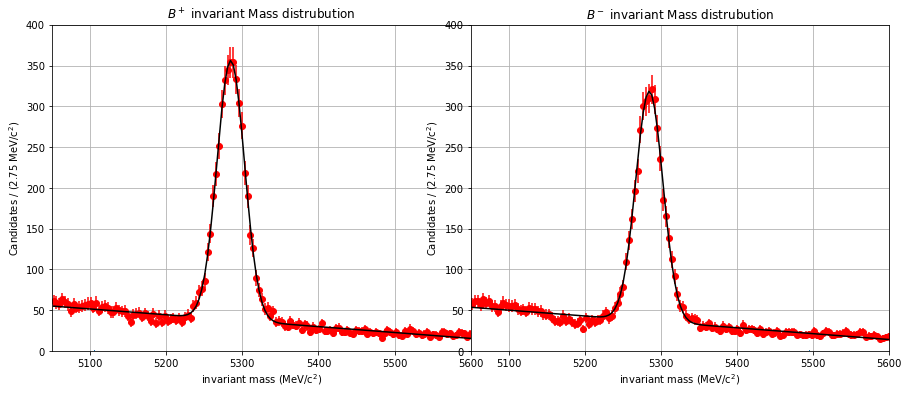

In [26]:
def b_mass_graph(b_invariant_mass, b_index):

    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
    axes = gs.subplots(sharex='row')
    
    titles = ["$B^+$ invariant Mass", "$B^-$ invariant Mass"]

    for is_minus, ax in enumerate(axes):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])

        a, b, s, m, c, d, f = curve_fitter(x[np.where((x > 5050) & (x < 5600))[0]], count[np.where((x > 5050) & (x < 5600))[0]])        
        y_trend = gaussian_equation(x, a, b, s, m, c, d, f)
        
        reduced_chi_squared = chi_squared(count, y_trend, np.sqrt(count))
        print("Reduced_chi_squared = {0:.2f}".format(reduced_chi_squared))

        ax.hist(b_invariant_mass[is_minus], bins=200, histtype='step',label='$p_{T}$')
        ax.errorbar(x, count, yerr=np.sqrt(count), color='r', fmt='o')
        ax.plot(x, y_trend, 'k', zorder=10)

        ax.grid()
        ax.set_xlim(5050, 5600)
        ax.set_ylim(0, 400)
        ax.set_xlabel("invariant mass (MeV/c$^2$)")
        ax.set_ylabel("Candidates / (2.75 MeV/c$^2$)")
        ax.set_title(titles[is_minus]+" distrubution")

    plt.savefig("invariant_mass_distrubtion_a_gaussian_straight_line.png")
    plt.show()

b_mass_graph(b_invariant_mass, b_index)

In [27]:
def gaussian(x, a, b, s):
    
    return a * np.exp(-(x-b)**2 / (2*s**2))

def exponetial(x, c, m):
    
    return c * np.exp(-(x-5350) / m)

In [28]:
def gaussian_equation(x, a, b, s, m, c, d, f):
    
    return a * np.exp(-(x-b)**2 / (2*s**2)) + d * np.exp(-(x-5050)**2 / (2*f**2)) + c * np.exp(-(x-5350) / m)

def curve_fitter(x, y):
    
    A_0 = np.max(y)
    b_0 = x[np.argmax(y)]
    std_0 = 20
    
    c_0 = 40
    m_0 = 50
    
    d_0 = 50
    f_0 = 100

    coeff, coveriance = curve_fit(gaussian_equation, x, y, p0=[A_0, b_0, std_0, m_0, c_0, d_0, f_0], maxfev=300000)

    return coeff, coveriance

(1, 37651) (1, 34926)


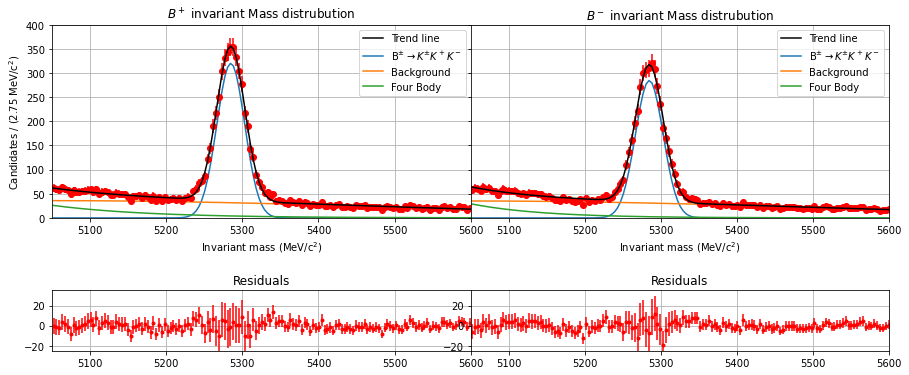

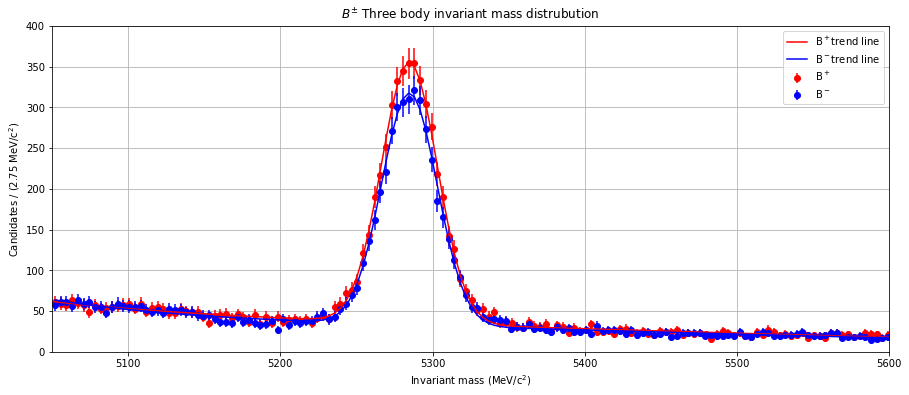

Gaussian Peak B+ = 320 ± 2,	Gaussian Peak B- = 284 ± 2
Gaussian Mean B+ = 5285 ± 0.1,	Gaussian Mean B- = 5285 ± 0.1
Gaussian Std B+ = 18 ± 0.1,	Gaussian Std B- = 18 ± 0.2

B+ reduced chi squared = 0.74,	B- reduced chi squared = 0.73


In [29]:
def b_mass_graph(b_invariant_mass, b_index):

    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(5, 2, hspace=0.1, wspace=0)
    
    axes = [fig.add_subplot(gs[0:3, 0]), fig.add_subplot(gs[0:3, 1])]
    residual_axes = [fig.add_subplot(gs[4, 0]), fig.add_subplot(gs[4, 1])]

    titles = ["$B^+$ invariant Mass", "$B^-$ invariant Mass"]
    
    curve_constants, curve_error = np.empty((0, 7)), np.empty((0, 7))
    reduced_chi_squared = ([]) 
    
    print(np.shape(b_index[0]), np.shape(b_index[1]))

    for is_minus, ax in enumerate(axes):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])
        
        coeff, coveriance = curve_fitter(x[np.where((x > 5050) & (x < 5600))[0]], count[np.where((x > 5050) & (x < 5600))[0]])
        a, b, s, m, c, d, f = coeff
        y_trend = gaussian_equation(x, a, b, s, m, c, d, f)
        
        curve_constants = np.vstack((curve_constants, coeff))
        curve_error = np.vstack((curve_error, np.sqrt(np.diag(coveriance))))
        
        reduced_chi_squared = np.append(reduced_chi_squared, chi_squared(count, y_trend, np.sqrt(count)))
        
        ax.errorbar(x, count, yerr=np.sqrt(count), color='r', fmt='o')
        ax.plot(x, y_trend, 'k', zorder=10, label='Trend line')
        
        ax.plot(x, gaussian(x, a, b, s), label=r'B$^± \rightarrow K^±K^+K^-$')
        ax.plot(x, gaussian(x, d, 5050, f), label='Background')
        ax.plot(x, exponetial(x, c, m), label='Four Body')
        
        ax.set_ylim(0, 400)
        ax.set_xlim(5050, 5600)
        ax.legend()
        ax.grid()
        
        ax.set_xlabel("Invariant mass (MeV/c$^2$)")
        ax.set_title(titles[is_minus]+" distrubution")
        
        if is_minus == 0:
            ax.set_ylabel("Candidates / (2.75 MeV/c$^2$)")
            
        else:
            ax.axes.yaxis.set_ticklabels([])
        
        residual_axes[is_minus].set_title("Residuals")
        residual_axes[is_minus].errorbar(x, count-y_trend, yerr=np.sqrt(count), color='r', fmt='.')
        residual_axes[is_minus].set_xlim(5050, 5600)
        residual_axes[is_minus].grid()
        residual_axes[is_minus].set_ylim(-25, 35)

    plt.savefig("invariant_mass_distrubtion_fit.png")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    
    hist_colour = ['r', 'b']
    labels = ['B$^+$', 'B$^-$']

    for is_minus in range(2):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)    
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])

        coeff, coveriance = curve_fitter(x[np.where((x > 5050) & (x < 5600))[0]], count[np.where((x > 5050) & (x < 5600))[0]])
        a, b, s, m, c, d, f = coeff

        ax.errorbar(x, count, yerr=np.sqrt(count), color=hist_colour[is_minus], fmt='o', label=labels[is_minus])
        ax.plot(x, gaussian_equation(x, a, b, s, m, c, d, f), color=hist_colour[is_minus], zorder=10,
                label=labels[is_minus]+'trend line')
         
    ax.set_xlim(5050, 5600)
    ax.set_ylim(0, 400)
    ax.legend()
    ax.grid()
    
    ax.set_xlabel("Invariant mass (MeV/c$^2$)")
    ax.set_ylabel("Candidates / (2.75 MeV/c$^2$)")
    ax.set_title("$B^±$ Three body invariant mass distrubution")

    plt.savefig("invariant_mass_distrubtion_two_gaussian.png")
    plt.show()

    return curve_constants[0], curve_constants[1], curve_error[0], curve_error[1], reduced_chi_squared

curve_constants_plus, curve_constants_minus, curve_error_plus, curve_error_minus, reduced_chi_squared= b_mass_graph(b_invariant_mass, b_index)

print("Gaussian Peak B+ = {0:.0f} ± {1:.0f},\tGaussian Peak B- = {2:.0f} ± {3:.0f}".format(curve_constants_plus[0], curve_error_plus[0],
                                                                                           curve_constants_minus[0], curve_error_minus[0]))
print("Gaussian Mean B+ = {0:.0f} ± {1:.1f},\tGaussian Mean B- = {2:.0f} ± {3:.1f}".format(curve_constants_plus[1], curve_error_plus[1], 
                                                                                    curve_constants_minus[1], curve_error_minus[1]))
print("Gaussian Std B+ = {0:.0f} ± {1:.1f},\tGaussian Std B- = {2:.0f} ± {3:.1f}".format(curve_constants_plus[2], curve_error_plus[2], 
                                                                                    curve_constants_minus[2], curve_error_minus[2]))
print("\nB+ reduced chi squared = {0:.2f},\tB- reduced chi squared = {1:.2f}".format(reduced_chi_squared[0], reduced_chi_squared[1]))                                    

In [30]:
def global_asymmetry(constants_plus, constants_minus, error_plus, error_minus):
    
    n_plus, n_minus = constants_plus[0], constants_minus[0]
    n_plus_error, n_minus_error = n_plus * (error_plus[0]/constants_plus[0]), n_minus * (error_minus[0]/constants_minus[0])
    
    A_raw = (n_minus - n_plus) / (n_plus + n_minus)
    A_raw_error = A_raw * np.sqrt(((n_plus_error+n_minus_error) / (n_minus-n_plus)) ** 2 +
                                  ((n_plus_error+n_minus_error) / (n_minus+n_plus)) ** 2)
    
    return A_raw, abs(A_raw_error)
    
A_raw, A_raw_error = global_asymmetry(curve_constants_plus, curve_constants_minus, curve_error_plus, curve_error_minus)
print("A_raw(KKK) = {0:.3f} ± {1:.3f}".format(A_raw, A_raw_error))

A_raw(KKK) = -0.059 ± 0.006


# Dalitz Plots

In [31]:
def dalitz_plotter(hist1, hist2, title, file_save):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    bins = [50, 50]
    
    hist = axes[0].hist2d(hist1[0], hist1[1], weights=hist1[2], bins=bins, cmin=1)
    hist1 = np.histogram2d(hist1[0], hist1[1], weights=hist1[2], bins=bins)
    axes[0].set_title("Dalitz plot of "+title)
    axes[0].set_xlabel(r"m$_{12}^2$ (GeV$^2$)")
    axes[0].set_ylabel(r"m$_{23}^2$ (GeV$^2$)")
    fig.colorbar(hist[3],ax=axes[0])
    
    hist = axes[1].hist2d(hist2[0], hist2[1], weights=hist2[2], bins=bins, cmin=1)
    hist2 = np.histogram2d(hist2[0], hist2[1], weights=hist2[2], bins=bins)
    axes[1].set_title("Dalitz plot of "+title+", higher and lower")
    axes[1].set_xlabel(r"Lower, m$_{23}^2$ (GeV$^2$)")
    axes[1].set_ylabel(r"Higher, m$_{12}^2$ (GeV$^2$)")
    fig.colorbar(hist[3],ax=axes[1])

    plt.savefig("Daltiz_plot_"+file_save+".png")
    plt.show()
    
    return hist1, hist2

In [32]:
def intergal_exponential(x, c, m):

    return - ((c*m) * np.exp(-(x-5350) / m))

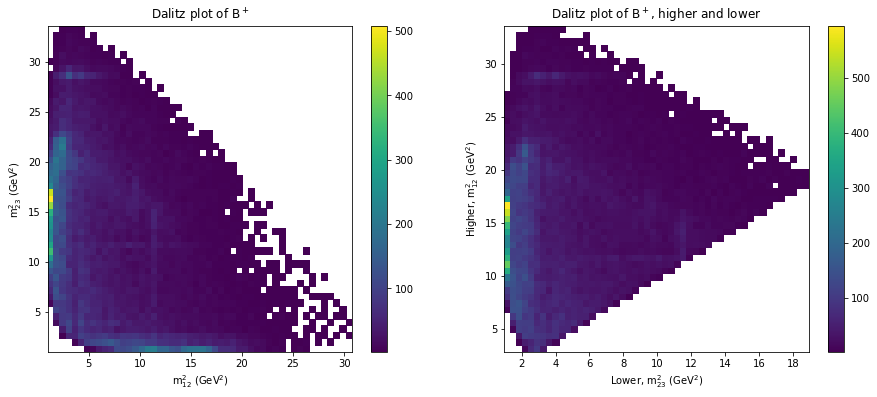

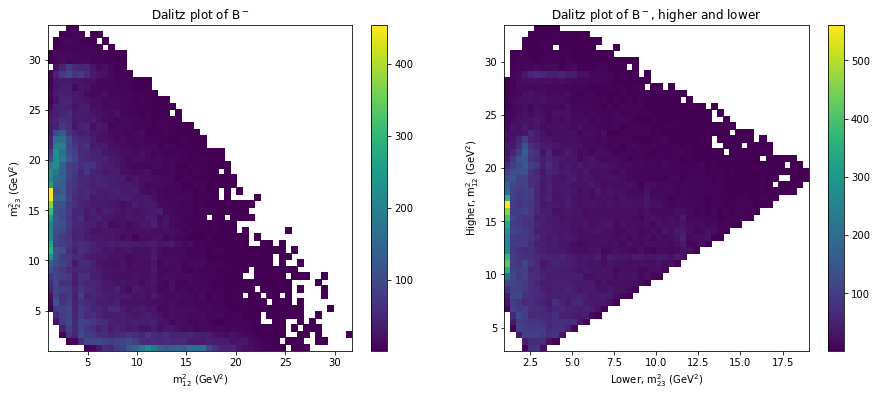

In [33]:
def dalitz_plot_two_body(p_x, p_y, p_z, charge, invariant_mass, constants, is_minus):
    
    total_charge, title_ending, file_ending = [1, -1], ["$^+$", "$^-$"], ["+", "-"]
    
    a, b, s, m, c, d, f = constants
    b_index = np.where((invariant_mass > b-3*s) & (invariant_mass < b+3*s) & (np.sum(charge, 1)==total_charge[is_minus]))
    b_index = np.where(np.sum(charge, 1)==total_charge[is_minus])    
    
    p_x, p_y, p_z, charge = p_x[b_index], p_y[b_index], p_z[b_index], charge[b_index]
    two_body_mass = np.square(two_body_invariant_mass(p_x, p_y, p_z, charge)) * 1*10**-6
    
    higher_mass = np.max(two_body_mass, 1)
    lower_mass = np.min(two_body_mass, 1)
    
    hist1_data, hist2_data = [two_body_mass[:, 0], two_body_mass[:, 1], None], [lower_mass, higher_mass, None]
    hist_title, file_save = "B"+title_ending[is_minus], "source_background_B"+file_ending[is_minus]
    
    return dalitz_plotter(hist1_data, hist2_data, hist_title, file_save)
    
raw_plus_unfolded, raw_plus_folded = dalitz_plot_two_body(p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted,
                                                          b_invariant_mass, curve_constants_plus, 0)
raw_minus_unfolded, raw_minus_folded = dalitz_plot_two_body(p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted,
                                                            b_invariant_mass, curve_constants_minus, 1)

In [34]:
def background(invariant_masses, constants):

    background_events = ([])

    a, b, s, m, c, d, f = constants

    three_sigma_plus, three_sigma_minus = b + 3*s, b - 3*s
    background = abs(int(intergal_exponential(three_sigma_plus, c, m) - intergal_exponential(three_sigma_minus, c, m)))
    
    five_sigma = b + 5*s

    invariant_masses_sorted = np.sort(invariant_masses)
    background_ends = invariant_masses_sorted[np.where(invariant_masses_sorted > five_sigma)[0][background-1]]

    return np.where((invariant_masses > five_sigma) & (invariant_masses <= background_ends))[0]
        
background_events_plus = background(b_invariant_mass[b_index[0]], curve_constants_plus)
background_events_minus = background(b_invariant_mass[b_index[1]], curve_constants_minus)

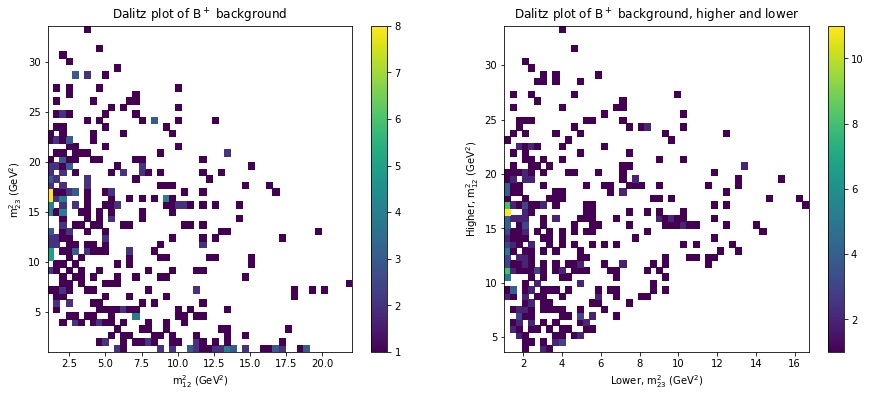

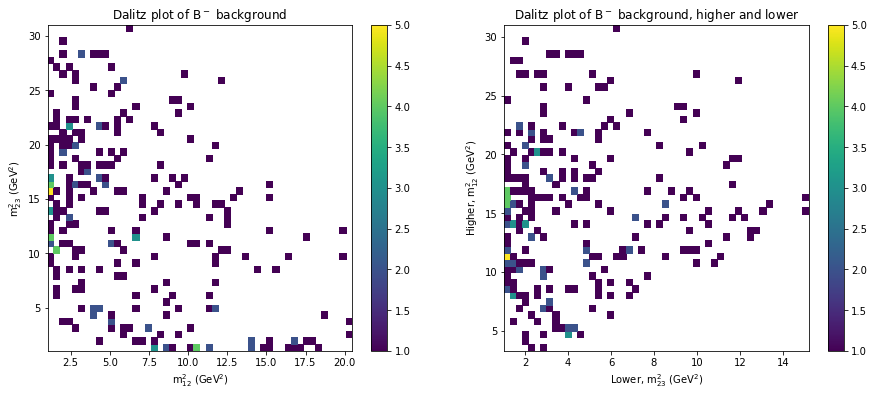

In [35]:
def dalitz_plot_background(p_x, p_y, p_z, charge, constants, is_minus, background):

    total_charge, title_ending, file_ending = [1, -1], ["$^+$", "$^-$"], ["+", "-"]
    
    a, b, s, m, c, d, f = constants
    b_index = np.where(np.sum(charge, 1)==total_charge[is_minus])
    
    p_x, p_y, p_z, charge = p_x[b_index], p_y[b_index], p_z[b_index], charge[b_index]
    two_body_mass = np.square(two_body_invariant_mass(p_x, p_y, p_z, charge)) * 1*10**-6
    
    higher_mass = np.max(two_body_mass, 1)
    lower_mass = np.min(two_body_mass, 1)
    
    hist1_data = [two_body_mass[background, 0], two_body_mass[background, 1], None]
    hist2_data = [lower_mass[background], higher_mass[background], None]
    hist_title, file_save = "B"+title_ending[is_minus]+" background", "background_B"+file_ending[is_minus]
    
    return dalitz_plotter(hist1_data, hist2_data, hist_title, file_save)

background_plus_unfolded, background_plus_folded = dalitz_plot_background(p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted,
                                                                          curve_constants_plus, 0, background_events_plus)
background_minus_unfolded, background_minus_folded = dalitz_plot_background(p_x_accepted, p_y_accepted, p_z_accepted, charge_accepted,
                                                                          curve_constants_plus, 1, background_events_minus)

In [36]:
def historgram_2d_weighting(hist_1, hist_2):
    
    xcentres = []
    ycentres = []
    for a,b in zip(hist_1[1][0:-1],hist_1[1][1:]):
        for c,d in zip(hist_1[2][0:-1],hist_1[2][1:]):
            xcentres.append( (a+b)/2 )
            ycentres.append( (c+d)/2 )
            
    w1 = (np.array(hist_1[0])).flatten()
    w2 = (np.array(hist_2[0])).flatten()

    return xcentres, ycentres, w1, w2

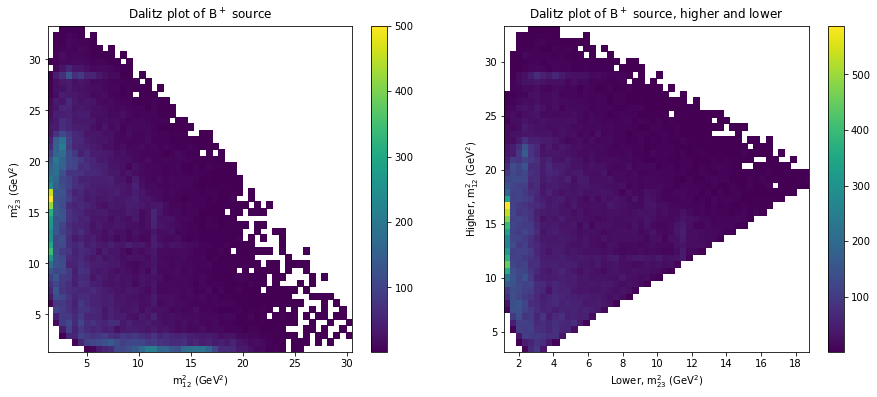

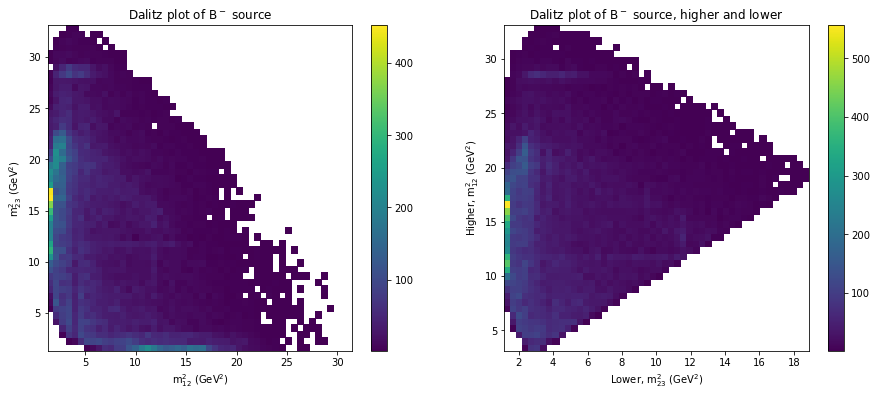

In [37]:
def dalitz_plot_source(bs_unfolded, bs_folded, b_unfolded, b_folded, plus_or_minus):
    
    title_ending, file_ending = ["$^+$", "$^-$"], ["+", "-"]
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(bs_unfolded, b_unfolded)
    
    wsub = np.subtract(w1, w2)
    wsub[np.where(wsub < 0)] = 0
    
    hist1_data = [xcentres, ycentres, wsub]
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(bs_folded, b_folded)
    
    wsub = np.subtract(w1, w2)
    wsub[np.where(wsub < 0)] = 0
    
    hist2_data = [xcentres, ycentres, wsub]
    
    hist_title, file_save = "B"+title_ending[plus_or_minus]+" source", "source_B"+file_ending[plus_or_minus]
    
    return dalitz_plotter(hist1_data, hist2_data, hist_title, file_save)
        
source_unfolded_plus, source_folded_plus = dalitz_plot_source(raw_plus_unfolded, raw_plus_folded,
                                                              background_plus_unfolded, background_plus_folded, 0)
source_unfolded_minus, source_folded_minus = dalitz_plot_source(raw_minus_unfolded, raw_minus_folded,
                                                                background_minus_unfolded, background_minus_folded, 1) 

# Local Asymmetry

In [38]:
def dalitz_plotter_zeros(hist1, hist2, title, file_save):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    bins = [50, 50]
    
    hist1 = axes[0].hist2d(hist1[0], hist1[1], weights=hist1[2], bins=bins)
    axes[0].set_title("Dalitz plot of "+title)
    axes[0].set_xlabel(r"m$_{12}^2$ (GeV$^2$)")
    axes[0].set_ylabel(r"m$_{23}^2$ (GeV$^2$)")
    fig.colorbar(hist1[3],ax=axes[0])
    
    hist2 = axes[1].hist2d(hist2[0], hist2[1], weights=hist2[2], bins=bins)
    axes[1].set_title("Dalitz plot of "+title+", higher and lower")
    axes[1].set_xlabel(r"Lower, m$_{23}^2$ (GeV$^2$)")
    axes[1].set_ylabel(r"Higher, m$_{12}^2$ (GeV$^2$)")
    fig.colorbar(hist2[3],ax=axes[1])

    plt.savefig("Daltiz_plot_"+file_save+".png")
    plt.show()
    
    return hist1, hist2

<ipython-input-39-afde9935a395>:5: RuntimeWarning: invalid value encountered in true_divide
  wnorm = np.divide(wsub, wplus)
<ipython-input-39-afde9935a395>:11: RuntimeWarning: invalid value encountered in true_divide
  wnorm = np.divide(wsub, wplus)


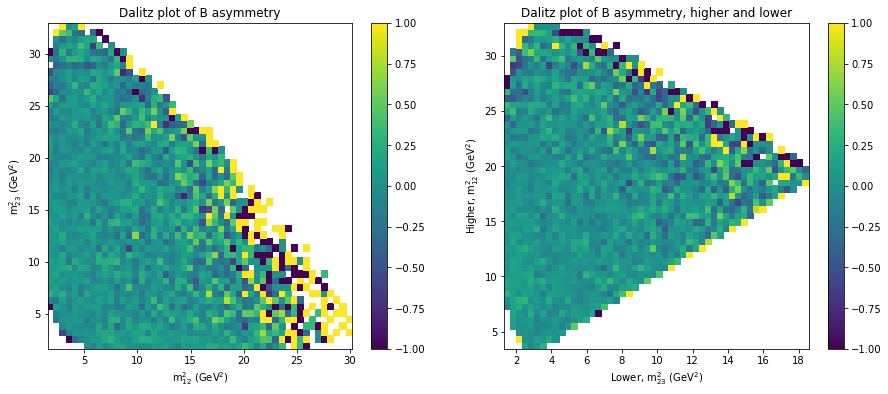

In [39]:
def local_asymmetry(unfolded_plus, unfolded_minus, folded_plus, folded_minus):
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(unfolded_plus, unfolded_minus)
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    wnorm = np.divide(wsub, wplus)
    
    hist1_data = [xcentres, ycentres, wnorm]
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(folded_plus, folded_minus)
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    wnorm = np.divide(wsub, wplus)
    
    hist2_data = [xcentres, ycentres, wnorm]
    
    hist_title, file_save = "B asymmetry", "asymmetry"
    
    return dalitz_plotter_zeros(hist1_data, hist2_data, hist_title, file_save)
    
unfolded, folded = local_asymmetry(source_unfolded_plus, source_unfolded_minus, source_folded_plus, source_folded_minus)

<ipython-input-40-cce14d203ee2>:6: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(wsub, wplus)
<ipython-input-40-cce14d203ee2>:14: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(wsub, wplus)


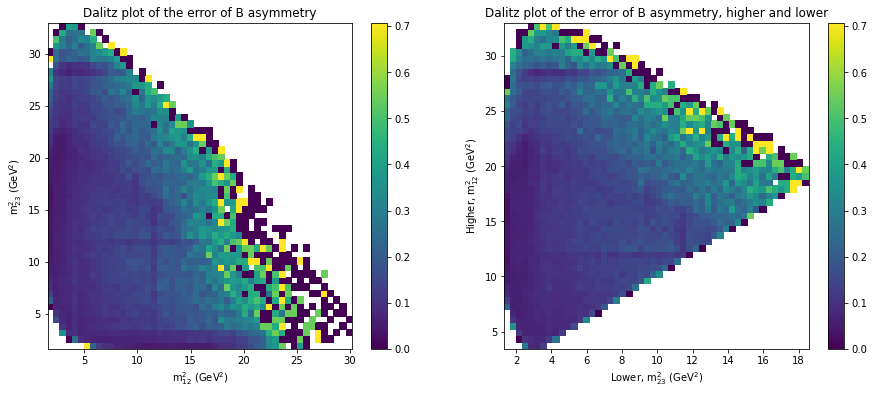

In [40]:
def local_asymmetry_error(unfolded_plus, unfolded_minus, folded_plus, folded_minus):
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(unfolded_plus, unfolded_minus)
    
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    A = np.divide(wsub, wplus)
    error = np.sqrt((1 - np.power(A, 2)) / wplus)
    
    hist1_data = [xcentres, ycentres, error]
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(folded_plus, folded_minus)
    
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    A = np.divide(wsub, wplus)
    error = np.sqrt((1 - np.power(A, 2)) / wplus)
    
    hist2_data = [xcentres, ycentres, error]
    
    hist_title, file_save = "the error of B asymmetry", "error"
    
    return dalitz_plotter_zeros(hist1_data, hist2_data, hist_title, file_save)
    
unfolded, folded = local_asymmetry_error(source_unfolded_plus, source_unfolded_minus, source_folded_plus, source_folded_minus)

<ipython-input-41-0abf9d4a7973>:6: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(wsub, wplus)
<ipython-input-41-0abf9d4a7973>:8: RuntimeWarning: divide by zero encountered in true_divide
  significance = A / error
<ipython-input-41-0abf9d4a7973>:15: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(wsub, wplus)
<ipython-input-41-0abf9d4a7973>:17: RuntimeWarning: divide by zero encountered in true_divide
  significance = A / error


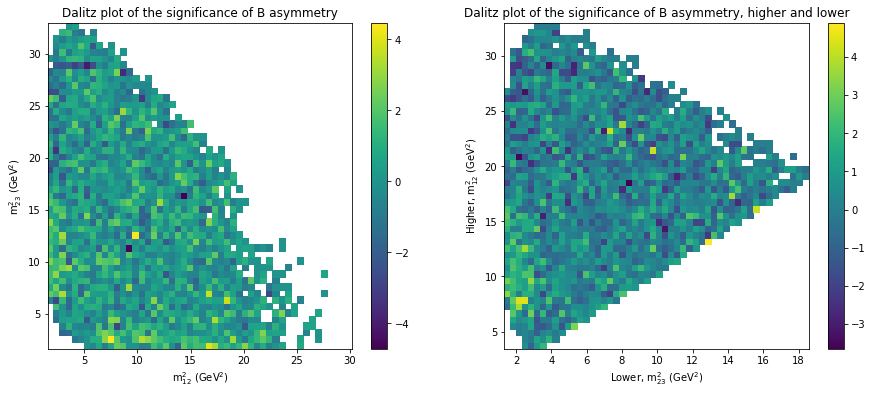

In [41]:
def local_asymmetry_significance(unfolded_plus, unfolded_minus, folded_plus, folded_minus):

    xcentres, ycentres, w1, w2 = historgram_2d_weighting(unfolded_plus, unfolded_minus)
    
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    A = np.divide(wsub, wplus)
    error = np.sqrt((1 - np.power(A, 2)) / wplus)    
    significance = A / error
    
    hist1_data = [xcentres, ycentres, significance]
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(folded_plus, folded_minus)
    
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    A = np.divide(wsub, wplus)
    error = np.sqrt((1 - np.power(A, 2)) / wplus)    
    significance = A / error
    
    hist2_data = [xcentres, ycentres, significance]
    
    hist_title, file_save = "the significance of B asymmetry", "significance"
    
    return dalitz_plotter_zeros(hist1_data, hist2_data, hist_title, file_save)
    
unfolded, folded = local_asymmetry_significance(source_unfolded_plus, source_unfolded_minus, 
                                                source_folded_plus, source_folded_minus)

In [56]:
def dalitz_plotter_significance(hist1, hist2, title, file_save):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    bin_width, bin_length = 1.5, 1.5

    x_bins = np.hstack((np.min(hist2[0]), np.arange(3.5, np.max(hist2[0]), bin_width)))
    y_bins = np.hstack((np.min(hist2[1]), 6.0, 8.0, np.arange(10.0, np.max(hist2[1]), bin_length)))
    
    hist1 = axes[0].hist2d(hist1[0], hist1[1], weights=hist1[2], bins=[x_bins, y_bins])
    axes[0].set_title("Dalitz plot of "+title)
    axes[0].set_xlabel(r"m$_{12}^2$ (GeV$^2$)")
    axes[0].set_ylabel(r"m$_{23}^2$ (GeV$^2$)")
    fig.colorbar(hist1[3],ax=axes[0])
    
    x_bins = np.hstack((np.min(hist2[0]), np.arange(3.5, np.max(hist2[0]), bin_width)))
    y_bins = np.hstack((np.min(hist2[1]), 6.0, 8.0, np.arange(10.0, np.max(hist2[1]), bin_length)))
    
    hist2 = axes[1].hist2d(hist2[0], hist2[1], weights=hist2[2], bins=[x_bins, y_bins])
    axes[1].set_title("Dalitz plot of "+title+", higher and lower")
    axes[1].set_xlabel(r"Lower, m$_{23}^2$ (GeV$^2$)")
    axes[1].set_ylabel(r"Higher, m$_{12}^2$ (GeV$^2$)")
    fig.colorbar(hist2[3],ax=axes[1])

    plt.savefig("Daltiz_plot_"+file_save+".png")
    plt.show()
    
    return hist1, hist2

<ipython-input-57-e3f711ff9c27>:6: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(wsub, wplus)
<ipython-input-57-e3f711ff9c27>:8: RuntimeWarning: divide by zero encountered in true_divide
  significance = A / error
<ipython-input-57-e3f711ff9c27>:15: RuntimeWarning: invalid value encountered in true_divide
  A = np.divide(wsub, wplus)
<ipython-input-57-e3f711ff9c27>:17: RuntimeWarning: divide by zero encountered in true_divide
  significance = A / error


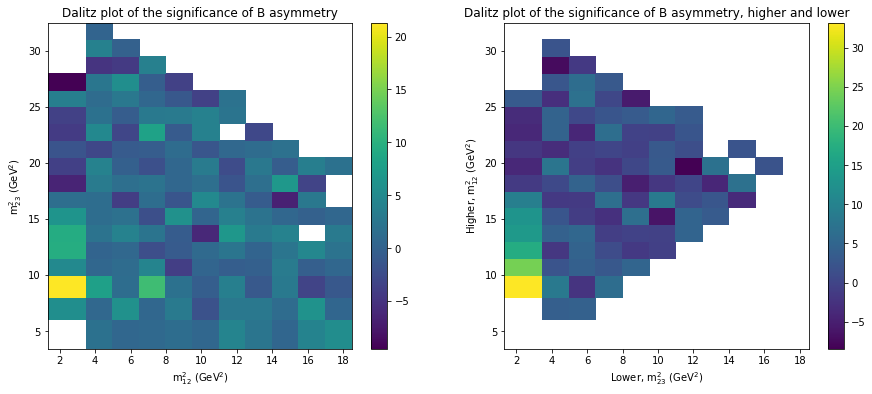

In [57]:
def local_asymmetry_significance(unfolded_plus, unfolded_minus, folded_plus, folded_minus):

    xcentres, ycentres, w1, w2 = historgram_2d_weighting(unfolded_plus, unfolded_minus)
    
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    A = np.divide(wsub, wplus)
    error = np.sqrt((1 - np.power(A, 2)) / wplus)    
    significance = A / error
    
    hist1_data = [xcentres, ycentres, significance]
    
    xcentres, ycentres, w1, w2 = historgram_2d_weighting(folded_plus, folded_minus)
    
    wsub, wplus = np.subtract(w1, w2), np.add(w1, w2)
    A = np.divide(wsub, wplus)
    error = np.sqrt((1 - np.power(A, 2)) / wplus)    
    significance = A / error
    
    hist2_data = [xcentres, ycentres, significance]
    
    hist_title, file_save = "the significance of B asymmetry", "significance_varible_bins"
    
    return dalitz_plotter_significance(hist1_data, hist2_data, hist_title, file_save)
    
unfolded, folded = local_asymmetry_significance(source_unfolded_plus, source_unfolded_minus, 
                                                source_folded_plus, source_folded_minus)

# Detector asymmetry

In [126]:
def selector_mag(tree):
    
    p_x, p_y, p_z, charge, prob_pi, prob_k, is_muon = tree_selector(tree)
    
    np.sort(prob_k, axis=0)

    kaon_ind = np.where((prob_k[:, 0] > 0.5) & (prob_k[:, 1] > 0.4) & (prob_k[:, 2] > 0.3))[0]
    kaon_sum = np.where(np.sum(prob_k, 1) > 1.8)[0]
    kaon = np.unique(np.hstack((kaon_ind, kaon_sum)))

    not_muon = np.where((is_muon[:, 0] == 0) & (is_muon[:, 1] == 0) & (is_muon[:, 2] == 0))[0]
    kaon, ind, unq_count = np.unique(np.hstack((kaon, not_muon)), return_inverse=True, return_counts=True)
    kaon = kaon[unq_count > 1]

    return p_x[kaon, :], p_y[kaon, :], p_z[kaon, :], charge[kaon, :]

In [190]:
def remove_d_0_mag(tree):
    
    p_x, p_y, p_z, charge = selector_mag(tree)
    
    invariant_masses = two_body_invariant_mass(p_x, p_y, p_z, charge)
    d_0 = np.unique(np.where((invariant_masses > d_0_masses[0, 0]) & (invariant_masses < d_0_masses[0, 1]))[0])
    
    invariant_masses_mis = two_body_invariant_mass_mis(p_x, p_y, p_z, charge)
    d_0_mis = np.unique(np.where((invariant_masses_mis > d_0_masses[0, 0]) & (invariant_masses_mis < d_0_masses[0, 1]))[0])
    
    d_0 = np.hstack((d_0, d_0_mis))
    
    return np.delete(p_x, d_0, 0), np.delete(p_y, d_0, 0), np.delete(p_z, d_0, 0), np.delete(charge, d_0, 0)

In [191]:
def b_plus_minus_mass_mag(tree):
    
    p_x, p_y, p_z, charge = remove_d_0_mag(tree)
    
    b_invariant_mass = invariant_mass_calulator(p_x, p_y, p_z)

    b_index_plus = np.where((np.sum(charge, 1) == 1) & (b_invariant_mass < 5800))
    b_index_minus = np.where((np.sum(charge, 1) == -1) & (b_invariant_mass < 5800))
    
    b_plus, b_minus = b_invariant_mass[b_index_plus], b_invariant_mass[b_index_minus]

    return b_invariant_mass, ([b_index_plus, b_index_minus])

In [192]:
def b_mass_graph_mag(tree, title, file_save):
    
    b_invariant_mass, b_index = b_plus_minus_mass_mag(tree)

    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(5, 2, hspace=0.1, wspace=0)
    
    axes = [fig.add_subplot(gs[0:3, 0]), fig.add_subplot(gs[0:3, 1])]
    residual_axes = [fig.add_subplot(gs[4, 0]), fig.add_subplot(gs[4, 1])]

    titles = ["$B^+$ invariant Mass", "$B^-$ invariant Mass"]
    
    curve_constants, curve_error = np.empty((0, 7)), np.empty((0, 7))
    reduced_chi_squared = ([])    

    for is_minus, ax in enumerate(axes):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])
        
        coeff, coveriance = curve_fitter(x[np.where((x > 5050) & (x < 5600))[0]], count[np.where((x > 5050) & (x < 5600))[0]])
        a, b, s, m, c, d, f = coeff
        y_trend = gaussian_equation(x, a, b, s, m, c, d, f)
        
        curve_constants = np.vstack((curve_constants, coeff))
        curve_error = np.vstack((curve_error, np.sqrt(np.diag(coveriance))))
        
        reduced_chi_squared = np.append(reduced_chi_squared, chi_squared(count, y_trend, np.sqrt(count)))
        
        ax.errorbar(x, count, yerr=np.sqrt(count), color='r', fmt='o')
        ax.plot(x, y_trend, 'k', zorder=10)
        
        ax.set_ylim(0, 250)
        ax.set_xlim(5050, 5600)
        ax.grid()
        
        ax.set_xlabel("Invariant mass (GeV/c$^2$)")
        ax.set_ylabel("Event count")
        ax.set_title(titles[is_minus]+" distrubution "+title)
        
        residual_axes[is_minus].errorbar(x, count-y_trend, yerr=np.sqrt(count), color='r', fmt='.')
        residual_axes[is_minus].set_xlim(5050, 5600)
        residual_axes[is_minus].grid()
        residual_axes[is_minus].set_ylim(-20, 25)
        
    plt.savefig("invariant_mass_distrubtion_"+file_save+".png")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    
    hist_colour = ['r', 'b']

    for is_minus in range(2):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)    
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])

        coeff, coveriance = curve_fitter(x[np.where((x > 5000) & (x < 5600))[0]], count[np.where((x > 5000) & (x < 5600))[0]])
        a, b, s, m, c, d, f = coeff

        ax.errorbar(x, count, yerr=np.sqrt(count), color=hist_colour[is_minus], fmt='o')
        ax.plot(x, gaussian_equation(x, a, b, s, m, c, d, f), 'k', zorder=10)
         
    ax.set_ylim(0, 250)
    ax.set_xlim(5050, 5600)
    ax.grid()
    
    ax.set_xlabel("Invariant mass (GeV/c$^2$)")
    ax.set_ylabel("Event count")
    ax.set_title("$B^±$ Three body invariant mass distrubution "+title)

    plt.savefig("invariant_mass_distrubtion_two_gaussian_"+file_save+".png")
    plt.show()

    return curve_constants[0], curve_constants[1], curve_error[0], curve_error[1], reduced_chi_squared

In [195]:
def global_asymmetry_mag(tree, title, file_save):
    
    constants_plus, constants_minus, error_plus, error_minus, mag_reduced_chi_squared = b_mass_graph_mag(tree, title, file_save)
    
    n_plus, n_minus = constants_plus[0], constants_minus[0]
    n_plus_error, n_minus_error = n_plus * (error_plus[0]/constants_plus[0]), n_minus * (error_minus[0]/constants_minus[0])
    
    A_mag = (n_minus - n_plus) / (n_plus + n_minus)
    A_mag_error = A_mag * np.sqrt(((n_plus_error+n_minus_error) / (n_minus-n_plus)) ** 2 +
                                  ((n_plus_error+n_minus_error) / (n_minus+n_plus)) ** 2)
    
    return A_mag, A_mag_error, mag_reduced_chi_squared

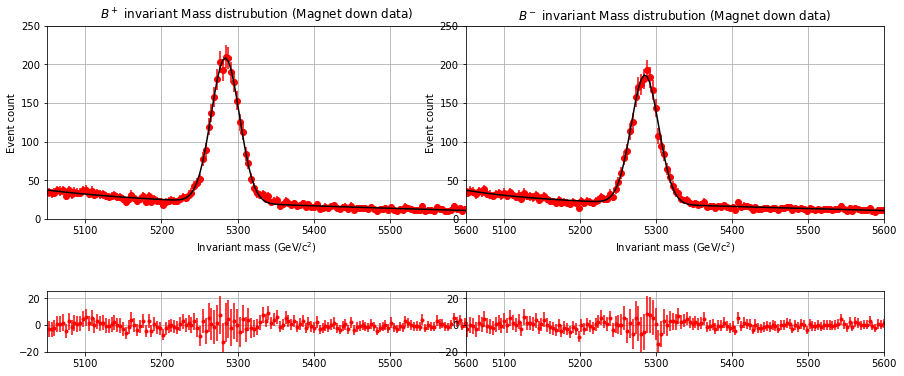

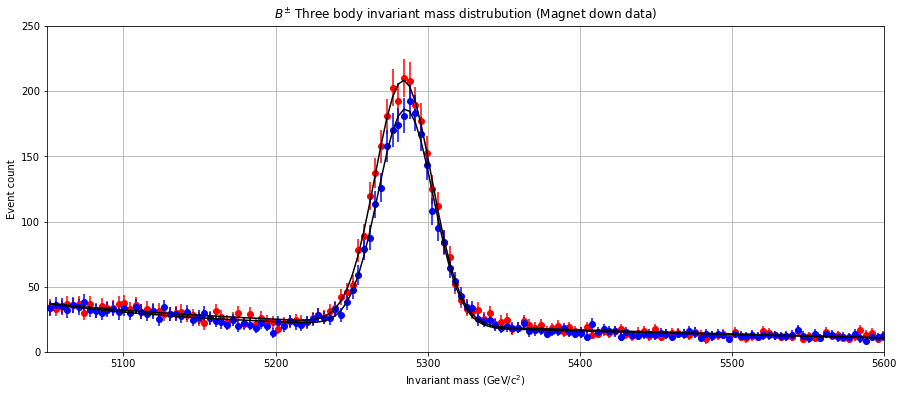

Measured asymmetry (Magnet down data) = -0.058 ± -0.008
B+ reduced chi squared = 0.51, B- reduced chi squared = 0.44


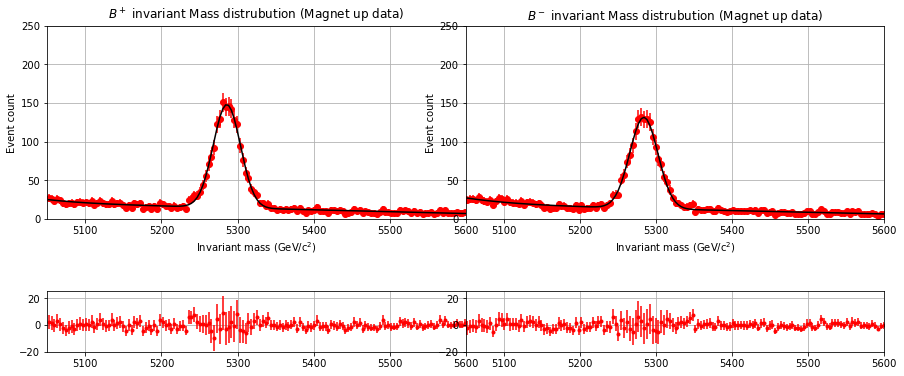

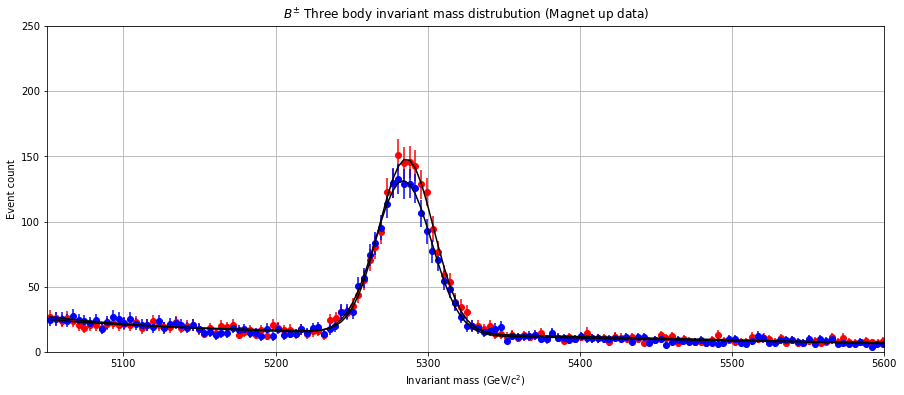

Measured asymmetry (Magnet up data) = -0.06 ± -0.01
B+ reduced chi squared = 0.51, B- reduced chi squared = 0.54

Arithmetic average asymmetry = -0.06 ± 0.01


In [196]:
def main():
    
    tree_up, tree_up_title, file_save_up = [events_down[b'DecayTree']], "(Magnet down data)", "magnet_down"  # Magnet down data
    tree_down, tree_down_title, file_save_down = [events_up['DecayTree']], "(Magnet up data)", "magnet_up"   # Magnet up data
    
    tree_up_asymmetry, up_error, mag_reduced_chi_squared = global_asymmetry_mag(tree_up, tree_up_title, file_save_up)
    print("Measured asymmetry (Magnet down data) = {0:.3f} ± {1:.3f}".format(tree_up_asymmetry, up_error))
    print("B+ reduced chi squared = {0:.2f}, B- reduced chi squared = {1:.2f}".format(mag_reduced_chi_squared[0],
                                                                                      mag_reduced_chi_squared[1]))
    
    tree_down_asymmetry, down_error, mag_reduced_chi_squared = global_asymmetry_mag(tree_down, tree_down_title, file_save_down)
    print("Measured asymmetry (Magnet up data) = {0:.2f} ± {1:.2f}".format(tree_down_asymmetry, down_error))
    print("B+ reduced chi squared = {0:.2f}, B- reduced chi squared = {1:.2f}".format(mag_reduced_chi_squared[0],
                                                                                      mag_reduced_chi_squared[1]))
    
    print("\nArithmetic average asymmetry = {0:.2f} ± {1:.2f}".format((tree_up_asymmetry + tree_down_asymmetry) / 2,
                                                                      np.sqrt(up_error**2 + down_error**2)))
                                                                             
main()

# J/psi asymmetry

In [197]:
trees = [events_down[b'DecayTree'],events_up['DecayTree']]

p_x_raw, p_y_raw, p_z_raw, charge_raw, prob_pi, prob_k, is_muon = tree_selector(trees)

In [198]:
def selector(p_x, p_y, p_z, charge, prob_k):
    
    np.sort(prob_k, axis=0)

    kaon_ind = np.where((prob_k[:, 0] > 0.5) & (prob_k[:, 1] > 0.4) & (prob_k[:, 2] > 0.3))[0]
    kaon_sum = np.where(np.sum(prob_k, 1) > 1.8)[0]
    kaon = np.unique(np.hstack((kaon_ind, kaon_sum)))

    return p_x[kaon, :], p_y[kaon, :], p_z[kaon, :], charge[kaon, :]

p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon = selector(p_x_raw, p_y_raw, p_z_raw, charge_raw, prob_k)

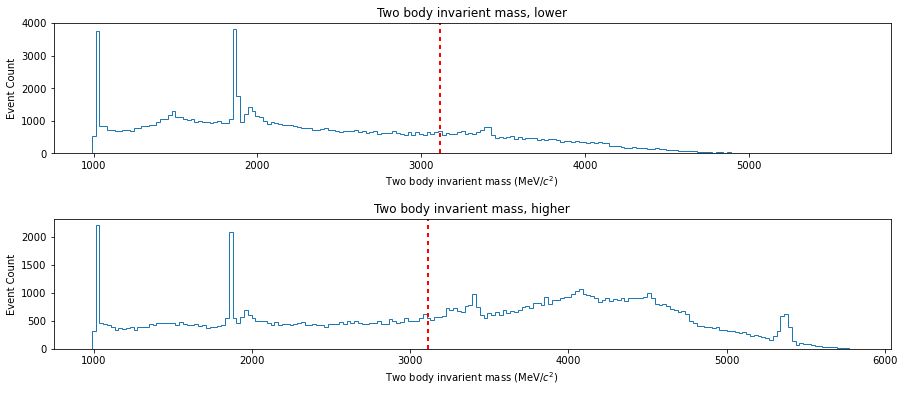

In [199]:
def two_body_mesons(p_x, p_y, p_z, charge):
    
    invariant_masses = np.sort(two_body_invariant_mass(p_x, p_y, p_z, charge), 0)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.5)
    
    high_low = ["lower", "higher"]
    
    for is_higher, ax in enumerate(axes):
        
        count, bins = np.histogram(invariant_masses[:, is_higher], bins=200)
        half_bin_width = (bins[1] - bins[0]) / 2
        ax.hist(invariant_masses[:, is_higher], bins=200, histtype='step',label='$p_{T}$')

        j_psi_index = np.where((bins > 3080) & (bins < 3110))[0]

        ax.set_title("Two body invarient mass, "+high_low[is_higher])
        ax.set_xlabel("Two body invarient mass (MeV$/c^2$)")
        ax.set_ylabel("Event Count")

        ax.axvline(x=bins[j_psi_index]+half_bin_width, color='r', dashes=(2, 2), linewidth=2)
            
    plt.savefig("two_body_invariant_mass.png")    
    plt.show()
    
    return bins[j_psi_index], half_bin_width * 2

j_psi, bin_width = two_body_mesons(p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon)

In [200]:
def selector_j_psi(p_x, p_y, p_z, charge, j_psi, bin_width):
    
    invariant_masses = two_body_invariant_mass(p_x, p_y, p_z, charge)
       
    j_psi = np.where((invariant_masses > j_psi) & (invariant_masses < j_psi + bin_width))[0]
    
    return p_x[j_psi, :], p_y[j_psi, :], p_z[j_psi, :], charge[j_psi, :]
    
p_x_j_psi, p_y_j_psi, p_z_j_psi, charge_j_psi = selector_j_psi(p_x_kaon, p_y_kaon, p_z_kaon, charge_kaon, j_psi, bin_width)

In [201]:
def b_plus_minus_mass(p_x, p_y, p_z, charge):
    
    b_invariant_mass = invariant_mass_calulator(p_x, p_y, p_z)

    b_index_plus = np.where((np.sum(charge, 1) == 1) & (b_invariant_mass < 5800))
    b_index_minus = np.where((np.sum(charge, 1) == -1) & (b_invariant_mass < 5800))
    
    b_plus, b_minus = b_invariant_mass[b_index_plus], b_invariant_mass[b_index_minus]

    return b_invariant_mass, ([b_index_plus, b_index_minus])

b_invariant_mass, b_index = b_plus_minus_mass(p_x_j_psi, p_y_j_psi, p_z_j_psi, charge_j_psi)

In [202]:
def gaussian_equation(x, a, b, s, m, c, d, f):
    
    return a * np.exp(-(x-b)**2 / (2*s**2)) + d * np.exp(-(x-5050)**2 / (2*f**2)) + c * np.exp(-(x-5350) / m)

def curve_fitter(x, y):
    
    A_0 = np.max(y)
    b_0 = x[np.argmax(y)]
    std_0 = 20
    
    c_0 = 1
    m_0 = 50
    
    d_0 = 1
    f_0 = 100

    coeff, coveriance = curve_fit(gaussian_equation, x, y, p0=[A_0, b_0, std_0, m_0, c_0, d_0, f_0], maxfev=300000)

    return coeff, coveriance

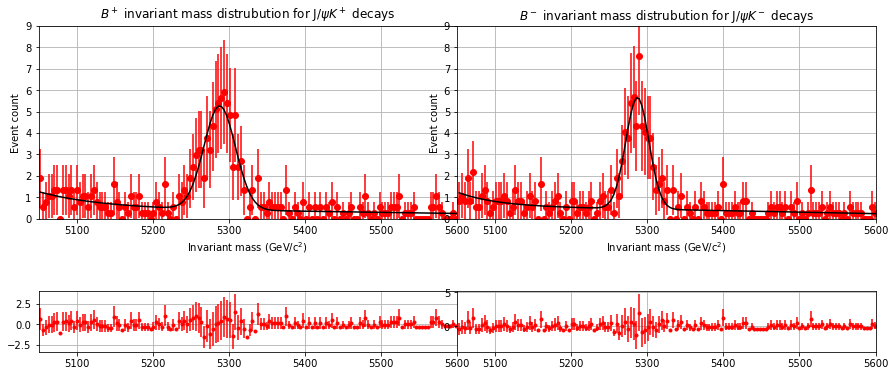

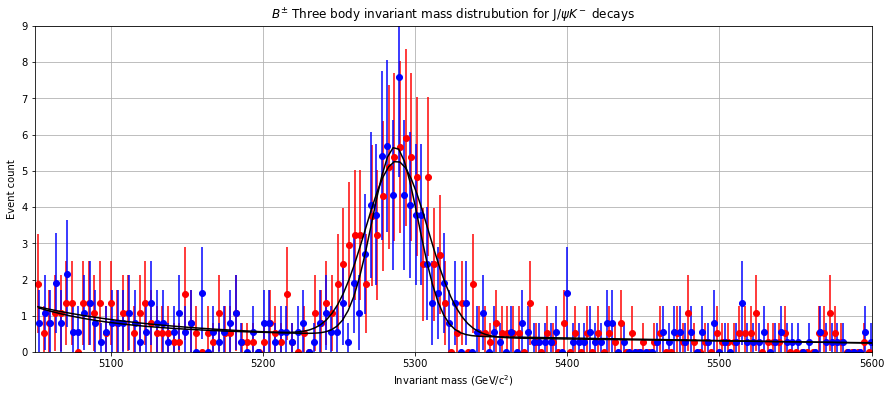

In [203]:
def b_mass_graph(b_invariant_mass, b_index):

    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(5, 2, hspace=0.1, wspace=0)
    
    axes = [fig.add_subplot(gs[0:3, 0]), fig.add_subplot(gs[0:3, 1])]
    residual_axes = [fig.add_subplot(gs[4, 0]), fig.add_subplot(gs[4, 1])]

    titles = ["$B^+$ invariant mass distrubution for J/$\psi$$K^+$ decays",
              "$B^-$ invariant mass distrubution for J/$\psi$$K^-$ decays"]
    
    curve_constants, curve_error = np.empty((0, 7)), np.empty((0, 7))
    reduced_chi_squared = ([])    

    for is_minus, ax in enumerate(axes):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])
        
        coeff, coveriance = curve_fitter(x[np.where((x > 5050) & (x < 5600))[0]], count[np.where((x > 5050) & (x < 5600))[0]])
        a, b, s, m, c, d, f = coeff
        y_trend = gaussian_equation(x, a, b, s, m, c, d, f)
        
        curve_constants = np.vstack((curve_constants, coeff))
        curve_error = np.vstack((curve_error, np.sqrt(np.diag(coveriance))))
        
        chi_count = np.delete(count, np.where(count == 0)[0])
        chi_y_trend = np.delete(y_trend, np.where(count == 0)[0])
        reduced_chi_squared = np.append(reduced_chi_squared, chi_squared(chi_count, chi_y_trend, np.sqrt(chi_count)))
        
        ax.errorbar(x, count, yerr=np.sqrt(count), color='r', fmt='o')
        ax.plot(x, y_trend, 'k', zorder=10)
        
        ax.set_xlim(5050, 5600)
        ax.set_ylim(0, 9)
        ax.grid()
        
        ax.set_xlabel("Invariant mass (GeV/c$^2$)")
        ax.set_ylabel("Event count")
        ax.set_title(titles[is_minus])
        
        residual_axes[is_minus].errorbar(x, count-y_trend, yerr=np.sqrt(count), color='r', fmt='.')
        residual_axes[is_minus].set_xlim(5050, 5600)
        residual_axes[is_minus].grid()
        
    plt.savefig("invariant_mass_distrubtion_j_psi.png")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    
    hist_colour = ['r', 'b']

    for is_minus in range(2):

        count_raw, bins = np.histogram(b_invariant_mass[b_index[is_minus]], 200)    
        x = np.diff(bins)/2 + bins[:-1]
        bin_width = bins[1] - bins[0]
        count = count_raw / (bins[1] - bins[0])

        coeff, coveriance = curve_fitter(x[np.where((x > 5000) & (x < 5600))[0]], count[np.where((x > 5000) & (x < 5600))[0]])
        a, b, s, m, c, d, f = coeff

        ax.errorbar(x, count, yerr=np.sqrt(count), color=hist_colour[is_minus], fmt='o')
        ax.plot(x, gaussian_equation(x, a, b, s, m, c, d, f), 'k', zorder=10)
         
    ax.set_xlim(5050, 5600)
    ax.set_ylim(0, 9)
    ax.grid()
    
    ax.set_xlabel("Invariant mass (GeV/c$^2$)")
    ax.set_ylabel("Event count")
    ax.set_title("$B^±$ Three body invariant mass distrubution for J/$\psi$$K^-$ decays")

    plt.savefig("invariant_mass_distrubtion_two_gaussian_j_psi.png")
    plt.show()

    return curve_constants[0], curve_constants[1], curve_error[0], curve_error[1], reduced_chi_squared
    
j_psi_constants_plus, j_psi_constants_minus, j_psi_error_plus, j_psi_error_minus, j_psi_reduced_chi_squared = b_mass_graph(b_invariant_mass, b_index)

In [204]:
def global_asymmetry(constants_plus, constants_minus, error_plus, error_minus):
    
    n_plus, n_minus = constants_plus[0], constants_minus[0]
    n_plus_error, n_minus_error = n_plus * (error_plus[0]/constants_plus[0]), n_minus * (error_minus[0]/constants_minus[0])
    
    A_raw = (n_minus - n_plus) / (n_plus + n_minus)
    A_raw_error = A_raw * np.sqrt(((n_plus_error+n_minus_error) / (n_minus-n_plus)) ** 2 +
                                  ((n_plus_error+n_minus_error) / (n_minus+n_plus)) ** 2)
    
    return A_raw, abs(A_raw_error)

In [205]:
A_raw_j_psi, A_raw_j_psi_error = global_asymmetry(j_psi_constants_plus, j_psi_constants_minus,
                                                  j_psi_error_plus, j_psi_error_minus)

print("A_raw(J/psiK) = {0:.2f} ± {1:.2f}".format(A_raw_j_psi, A_raw_j_psi_error))
print("B+ reduced chi squared = {0:.2f}, B- reduced chi squared = {1:.2f}".format(j_psi_reduced_chi_squared[0],
                                                                                  j_psi_reduced_chi_squared[1]))

A_raw(J/psiK) = 0.04 ± 0.04
B+ reduced chi squared = 0.15, B- reduced chi squared = 0.17
